In [1]:
#!git clone "https://github.com/Sopralapanca/CommonLitChallenge.git"

Cloning into 'CommonLitChallenge'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 25 (delta 2), reused 10 (delta 0), pack-reused 0
Receiving objects: 100% (25/25), 1.15 MiB | 17.36 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [1]:
import pandas as pd
summaries_train_path = "./data/summaries_train.csv"
prompt_train_path = "./data/prompts_train.csv"

summaries_test_path = "./data/summaries_test.csv"
prompt_test_path = "./data/prompts_test.csv"

train_data = pd.read_csv(summaries_train_path, sep=',', index_col=0)
prompt_data = pd.read_csv(prompt_train_path, sep=',', index_col=0)


In [2]:
len(train_data)

7165

In [4]:
!which python

/usr/bin/python


In [3]:
!pip3 list

Package                       Version
----------------------------- --------------------
absl-py                       0.10.0
AccessControl                 5.0
acme                          1.1.0
Acquisition                   4.7
alabaster                     0.7.12
alembic                       1.4.3
allennlp                      1.3.0
antlr4-python3-runtime        4.8
anyio                         2.2.0
argon2-cffi                   20.1.0
astunparse                    1.6.3
async-generator               1.10
attrs                         19.3.0
AuthEncoding                  4.2
Automat                       0.8.0
Babel                         2.9.0
backcall                      0.2.0
beautifulsoup4                4.9.3
bleach                        3.3.0
blis                          0.7.4
boto3                         1.16.40
botocore                      1.19.40
BTrees                        4.7.2
cachetools                    4.2.0
catalogue                     1.0.0
certbot     

In [3]:
len(prompt_data)

4

In [4]:
train_data.head()

,prompt_id,text,content,wording
student_id,,,,
000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538
0020ae56ffbf,ebad26,They would rub it up with soda to make the sme...,-0.548304,0.506755
004e978e639e,3b9047,"In Egypt, there were many occupations and soci...",3.128928,4.231226
005ab0199905,3b9047,The highest class was Pharaohs these people we...,-0.210614,-0.471415
0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757


In [5]:
prompt_data.head()

,prompt_question,prompt_title,prompt_text
prompt_id,,,
39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...
3b9047,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...
814d6b,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an..."


In [6]:
training_data = train_data.merge(prompt_data, on='prompt_id')
training_data.head()

,prompt_id,text,content,wording,prompt_question,prompt_title,prompt_text
0,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
1,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
2,814d6b,The third wave only started as an experiment w...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
3,814d6b,The experimen was orginally about how even whe...,0.567975,0.969062,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
4,814d6b,The third wave developed so quickly due to the...,-0.910596,-0.081769,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...


In [7]:
summary_word_count = training_data['text'].apply(lambda x: len(x.split()))
prompt_word_count = training_data['prompt_text'].apply(lambda x: len(x.split()))

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

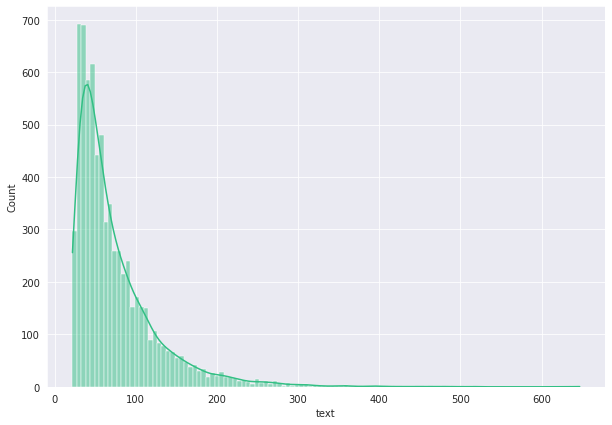

In [9]:
# Length of the summaries made by the students
fig = plt.figure(figsize=[10,7])
sns.histplot(summary_word_count, color=sns.xkcd_rgb['greenish teal'], kde=True)
plt.show()

In [10]:
summary_word_count.max()

647

In [11]:
# Sorting the DataFrame based on the length of strings in the 'text' column
df_sorted = training_data.sort_values(by='text', key=lambda x: x.str.len(), ascending=False)
df_sorted.head()

,prompt_id,text,content,wording,prompt_question,prompt_title,prompt_text
4765,3b9047,The base starts with farmers and slaves. The e...,3.021960,0.708060,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...
5820,39c16e,"An ideal tragedy must have a relateable hero, ...",3.369991,3.897941,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...
6287,39c16e,Three elements of an ideal tragedy as describe...,2.807019,1.923362,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...
3701,3b9047,Ancient Egypt's system of government is differ...,3.160636,3.346665,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...
3897,3b9047,The text says that the social structure works ...,1.959735,2.347619,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...


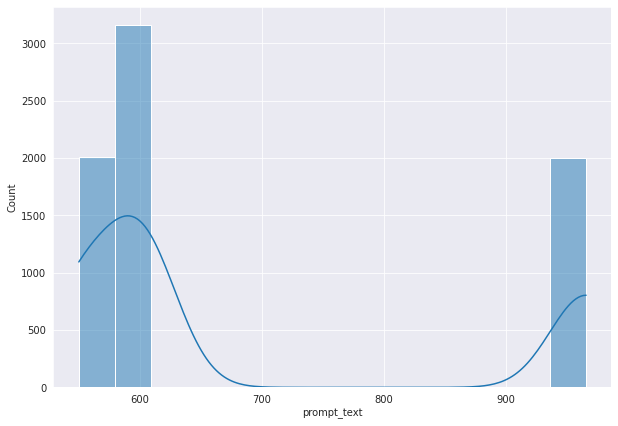

In [12]:
# length of the full chapter
fig = plt.figure(figsize=[10,7])
sns.histplot(prompt_word_count, kde=True)
plt.show()

# Preprocessing dataset

In [13]:
from spacy.lang.en import English
import spacy

def preprocessText(text):
    try:
        # replace newline with space
        text = text.replace("\n", " ")
        # split text
        words = text.split()

        # stop word removal
        stop_words = spacy.lang.en.stop_words.STOP_WORDS
        words = [w for w in words if not w in stop_words]
        # return pre-processed paragraph text
        text = ' '.join(words)
        return text
    except:
        return text

In [14]:
string_columns = ["text","prompt_question","prompt_title","prompt_text"]

for col in string_columns:
  # apply preprocessText function to each text column in the dfTrain dataframe
  training_data[col] = training_data[col].apply(lambda x: preprocessText(x))

training_data.head()

,prompt_id,text,content,wording,prompt_question,prompt_title,prompt_text
0,814d6b,The wave experimentto people reacted new leade...,0.205683,0.380538,Summarize Third Wave developed short period ti...,The Third Wave,Background The Third Wave experiment took plac...
1,814d6b,The Third Wave developed rapidly students genu...,3.272894,3.219757,Summarize Third Wave developed short period ti...,The Third Wave,Background The Third Wave experiment took plac...
2,814d6b,The wave started experiment class slowly sprea...,0.205683,0.380538,Summarize Third Wave developed short period ti...,The Third Wave,Background The Third Wave experiment took plac...
3,814d6b,The experimen orginally terrible thngs happeni...,0.567975,0.969062,Summarize Third Wave developed short period ti...,The Third Wave,Background The Third Wave experiment took plac...
4,814d6b,The wave developed quickly students particip t...,-0.910596,-0.081769,Summarize Third Wave developed short period ti...,The Third Wave,Background The Third Wave experiment took plac...


In [15]:
summary_word_count = training_data['text'].apply(lambda x: len(x.split()))
prompt_word_count = training_data['prompt_text'].apply(lambda x: len(x.split()))
prompt_question_word_count = training_data['prompt_question'].apply(lambda x: len(x.split()))
prompt_title_word_count = training_data['prompt_title'].apply(lambda x: len(x.split()))

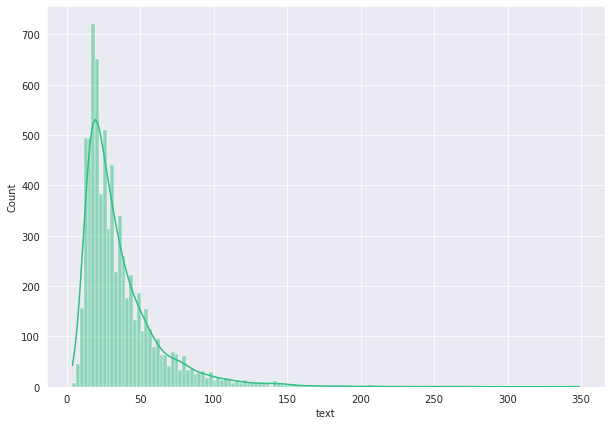

In [16]:
# Length of the summaries made by the students
fig = plt.figure(figsize=[10,7])
sns.histplot(summary_word_count, color=sns.xkcd_rgb['greenish teal'], kde=True)
plt.show()

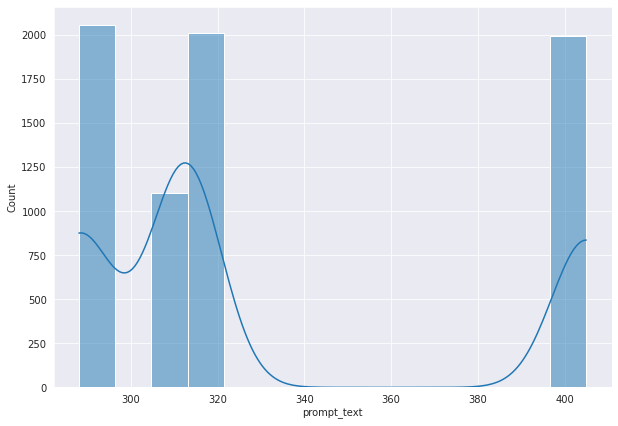

In [17]:
fig = plt.figure(figsize=[10,7])
sns.histplot(prompt_word_count, kde=True)
plt.show()

In [18]:
summary_word_count.max()

349

In [19]:
prompt_word_count.max()

405

In [20]:
prompt_question_word_count.max()

18

In [21]:
prompt_title_word_count.max()

3

In [22]:
#MAX_LEN = summary_word_count.max() + prompt_word_count.max() + prompt_question_word_count.max() + prompt_title_word_count.max() + 3 # 3 for the separators
MAX_LEN = 950

# PyTorch Dataset

In [23]:
from transformers import AutoConfig, AutoTokenizer, AutoModel
## Model Configurations
MODEL_NAME = 'microsoft/deberta-v3-base'

config = AutoConfig.from_pretrained(MODEL_NAME) ## Configuration loaded from AutoConfig
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME) ## Tokenizer loaded from AutoTokenizer

KeyError: 'deberta-v2'

In [34]:
tokenizer

PreTrainedTokenizerFast(name_or_path='bert-base-cased', vocab_size=28996, model_max_len=512, is_fast=True, padding_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})

In [115]:
from torch.utils.data import Dataset, DataLoader
import torch

class CommonLitDataset(Dataset):

    def __init__(self, data, maxlen, tokenizer, target_cols):
        #Store the contents of the file in a pandas dataframe
        self.df = data.reset_index()
        #Initialize the tokenizer for the desired transformer model
        self.tokenizer = tokenizer
        #Maximum length of the tokens list to keep all the sequences of fixed size
        self.maxlen = maxlen

        #list of target columns
        self.target_cols = target_cols

    def __len__(self):
        return self.df.shape[0]

    def __getitem__(self, index):
        #Select the sentence and label at the specified index in the data frame
        text = self.df.loc[index, "text"]
        prompt_question = self.df.loc[index, "prompt_question"]
        prompt_title = self.df.loc[index, "prompt_title"]
        prompt_text = self.df.loc[index, "prompt_text"]

        full_text = prompt_title+" " + self.tokenizer.sep_token +" "+ prompt_text+" " + self.tokenizer.sep_token +" "+ prompt_question+" " + self.tokenizer.sep_token +" "+ text

        #Preprocess the text to be suitable for the transformer
        tokens = self.tokenizer.tokenize(full_text)
        tokens = ['[CLS]'] + tokens + ['[SEP]']
        if len(tokens) < self.maxlen:
            tokens = tokens + ['[PAD]' for _ in range(self.maxlen - len(tokens))]
        else:
            tokens = tokens[:self.maxlen-1] + ['[SEP]']

        #Obtain the indices of the tokens in the BERT Vocabulary
        input_ids = self.tokenizer.convert_tokens_to_ids(tokens)
        input_ids = torch.tensor(input_ids)
        #Obtain the attention mask i.e a tensor containing 1s for no padded tokens and 0s for padded ones
        attention_mask = (input_ids != 0).long()

        try:
            target = self.df.loc[index, self.target_cols]
        except Exception as e:
           raise e

        target = torch.tensor(target, dtype=torch.float32)

        return input_ids, attention_mask, target

In [116]:
from sklearn.model_selection import train_test_split

train, validation = train_test_split(training_data,  test_size=0.2)
print(train.shape, validation.shape)

(5732, 7) (1433, 7)


In [117]:
target_cols=["content", "wording"]
train_set = CommonLitDataset(data=train, maxlen=MAX_LEN, tokenizer=tokenizer, target_cols=target_cols)
valid_set = CommonLitDataset(data=validation, maxlen=MAX_LEN, tokenizer=tokenizer, target_cols=target_cols)

In [118]:
BATCH_SIZE = 2
train_loader = DataLoader(dataset=train_set, batch_size=BATCH_SIZE)
valid_loader = DataLoader(dataset=valid_set, batch_size=BATCH_SIZE)

In [119]:
#print(len(train_loader))
#sample = next(iter(train_loader))
#sample

In [120]:
# batch of sentences, all the sentences must be MAX_LEN length because they are padded
#sample[0].shape

In [121]:
# batch of attention masks
#sample[1].shape

In [122]:
#sample[1]

In [123]:
# target
#sample[2].shape

# PyTorch Model

In [124]:
from torch import nn

class RMSELoss(nn.Module):
    def __init__(self, eps=1e-6):
        super().__init__()
        self.mse = nn.MSELoss()
        self.eps = eps

    def forward(self, yhat, y):
        loss = torch.sqrt(self.mse(yhat, y) + self.eps)
        return loss


class MCRMSELoss(nn.Module):
    def __init__(self, num_scored=2):
        super().__init__()
        self.rmse = RMSELoss()
        self.num_scored = num_scored

    def forward(self, yhat, y):
        score = 0
        for i in range(self.num_scored):
            score += self.rmse(yhat[:, i], y[:, i]) / self.num_scored

        return score

In [125]:
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from transformers import DebertaModel, DebertaPreTrainedModel, TrainingArguments, Trainer

class DeBERTaRegressor(DebertaPreTrainedModel):
    def __init__(self, config):
        super().__init__(config)
        self.deberta = AutoModel.from_config(config)
        #The output layer that takes the [CLS] representation and gives an output
        self.cls_layer1 = nn.Linear(config.hidden_size,128)
        self.relu1 = nn.ReLU()
        self.ff1 = nn.Linear(128,2)

    def forward(self, input_ids, attention_mask):
        #Feed the input to Bert model to obtain contextualized representations
        outputs = self.deberta(input_ids=input_ids, attention_mask=attention_mask)
        #Obtain the representations of [CLS] heads
        logits = outputs.last_hidden_state[:,0,:]
        output = self.cls_layer1(logits)
        output = self.relu1(output)
        output = self.ff1(output)
        return output

In [126]:
def evaluate(model, criterion, dataloader, device):
    model.eval()
    mean_acc, mean_loss, count = 0, 0, 0

    with torch.no_grad():
        for input_ids, attention_mask, target in (dataloader):

            input_ids, attention_mask, target = input_ids.to(device), attention_mask.to(device), target.to(device)
            output = model(input_ids, attention_mask)

            mean_loss += criterion(output, target).item()
            count += 1

    return mean_loss/count

In [127]:
def train(model, criterion, optimizer, train_loader, val_loader, epochs, device):
    best_acc = 0
    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for i, (input_ids, attention_mask, target) in enumerate(iterable=train_loader):
            optimizer.zero_grad()

            input_ids = input_ids.to(device)
            attention_mask = attention_mask.to(device)
            target = target.to(device)

            output = model(input_ids=input_ids, attention_mask=attention_mask)

            loss = criterion(output, target.type_as(output))
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

        tl = train_loss/len(train_loader)
        val_loss = evaluate(model=model, criterion = criterion, dataloader=val_loader, device=device)
        print(f"Epoch {epoch} - Trainnig Loss: {tl} - Validation Loss : {val_loss}")

In [130]:
del model
import gc
gc.collect()


4413

In [129]:
LR = 0.001
device = "cuda" if torch.cuda.is_available() else "cpu"
model = DeBERTaRegressor(config=config).to(device)

OPTIMIZER = optim.Adam(params=model.parameters(), lr=LR)
EPOCHS = 5
CRITERION = MCRMSELoss()
train(model=model,
      criterion=CRITERION,
      optimizer=OPTIMIZER,
      train_loader=train_loader,
      val_loader=valid_loader,
      epochs = EPOCHS,
     device = device)

RuntimeError: ignored

In [ ]:
from sklearn.metrics import mean_squared_error

def compute_metrics(eval_pred):
  predictions, labels = eval_pred
  rmse = mean_squared_error(labels, predictions, squared=False)
  return {"rmse":rmse}

In [ ]:
!pip install accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 4.6 MB/s eta 0:00:00


In [ ]:
training_args = TrainingArguments(per_device_eval_batch_size=32,
                                  per_device_train_batch_size=32,
                                  num_train_epochs=5,
                                  evaluation_strategy = "steps",
                                  output_dir='/content/',
                                  gradient_accumulation_steps=4)

device = "cuda" if torch.cuda.is_available() else "cpu"
model = DeBERTaRegressor(config=config).to(device)


trainer = Trainer(model=model, args=training_args, train_dataset=train_loader, eval_dataset=valid_loader,
                  compute_metrics=compute_metrics)
result = trainer.train()
result

ImportError: ignored